# Notebook Instructions
<i>You can run the notebook document sequentially (one cell at a time) by pressing <b>shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i> <BR>
    
This course is based on specific versions of python packages. You can find the details of the same in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>. The manual also explains how to use these codes in other versions of python packages. <BR>

# Regime Change Detection

Regime change detection helps in identifying any change in a stock's regime.
There are three traditional methods to identify a stock's regime:
1. Breakouts-Breakdowns happen when price prints new highs or lows over a period of time. The default duration is 52 weeks or 252 days for checking the new highs and lows.
2. Moving average defines outperformers as those stocks that trade above an average line and underperformers as those below it. The default moving average is a 200-day simple moving average.
3. HHLL: In this method, you classify a stock as a winner if it makes a new high that is higher than the previous ones. Similarly, you classify a stock as a loser if it makes a new low that is lower than the previous ones.

In this notebook, you will learn to detect a change in stock's regime using the first method, Breakouts-Breakdowns.

 This notebook is divided into the following parts:
 
1.  Import Data
2.  Create a Breakout model 
3.  Create a Breakdown model
4.  Create a Breakout-Breakdown model

Also, you will learn to create a function for the same. This function will be stored in the 'short_selling.py' file in the downloadables section in the last unit of this course. 

## Import libraries

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

%matplotlib inline

# To avoid warnings
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Import data
### File names: 
1. Jan_2010_to_Jan_2019_Rebased_Series.


This data is available in the last unit of this course. You can find this file in the downloadables section of the course. We import this data by using the pandas function 'pandas.read_csv()'.This function will read the comma-separated values (CSV) file into dataframe.

In [2]:
 # Data is stored in the directory 'data_modules' 
relative_path = "../data_modules/"

# Reads and imports the rebased series using the function 'read_csv'
data = pd.read_csv(
    relative_path + 'Jan_2010_to_Jan_2019_Rebased_Series.csv', index_col=0, parse_dates=True)

# Convert index as datetime
data.index = pd.to_datetime(data.index)

# Returns the top 2 rows of the dataset
data.head(2)

,Open,High,Low,Close,USDGBP,SP500,adjustment_factor,relative_open,relative_high,relative_low,relative_close,rebased_open,rebased_high,rebased_low,rebased_close
Date,,,,,,,,,,,,,,,
2010-01-04,15.24,15.75,15.12,15.69,0.62,113.33,70.35,0.22,0.22,0.21,0.22,15.24,15.75,15.12,15.69
2010-01-05,15.74,16.21,15.70,16.20,0.63,113.63,71.06,0.22,0.23,0.22,0.23,15.58,16.05,15.54,16.04


In [3]:
# Set the breakout_window=252, which by default is 252 or 52 weeks
breakout_window = 252

# Calculate the rolling high for 252 days
data['rolling_high'] = data.rebased_high.rolling(breakout_window).max()

# Calculate the rolling low for 252 days
data['rolling_low'] = data.rebased_low.rolling(breakout_window).min()

# Returns the last 2 rows of the dataset
data.tail(2)

,Open,High,Low,Close,USDGBP,SP500,adjustment_factor,relative_open,relative_high,relative_low,relative_close,rebased_open,rebased_high,rebased_low,rebased_close,rolling_high,rolling_low
Date,,,,,,,,,,,,,,,,,
2018-12-31,24.57,24.97,24.37,24.64,0.79,249.92,196.32,0.13,0.13,0.12,0.13,8.80,8.95,8.73,8.83,11.94,8.13
2019-01-02,24.08,25.14,24.01,24.96,0.80,250.18,200.63,0.12,0.13,0.12,0.12,8.44,8.82,8.42,8.75,11.94,8.13


# Regime breakout

Regime breakout occurs whenever the price of a stock moves above a resistance area. In this case, when the rebased high is higher than the rolling high, we go long or buy the stock. And this is called regime breakout. Here, we create a 252 days breakout model.

In [4]:
# Calculate and identify the regime_breakout when 'rebased high' >= 'rolling high'
data['regime_breakout_252'] = np.where(
    data['rebased_high'] >= data['rolling_high'], 1, 0)

In [5]:
# Create a function 'plot_graph' 
def plot_graph(data, ylabel, xlabel, title, legend):
    plt.figure(figsize=(10, 7))
    plt.plot(data)
    # Label title
    plt.title(title, fontsize=16)
    # Label x axis
    plt.xlabel(xlabel, fontsize=14)
    # Label y axis
    plt.ylabel(ylabel, fontsize=14)
    # Add legend
    plt.legend(labels=legend)
    # Add a grid
    plt.grid()
    # Display the graph
    plt.show()

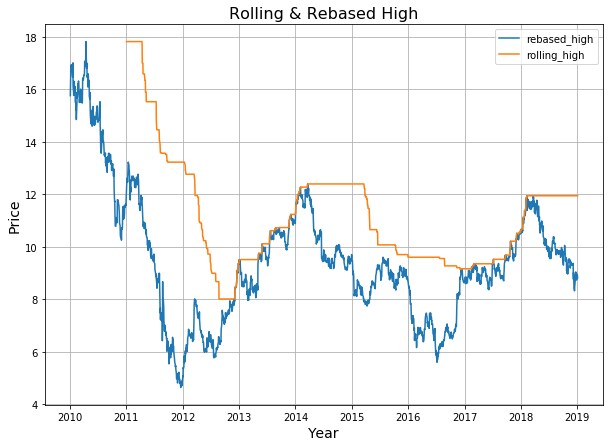

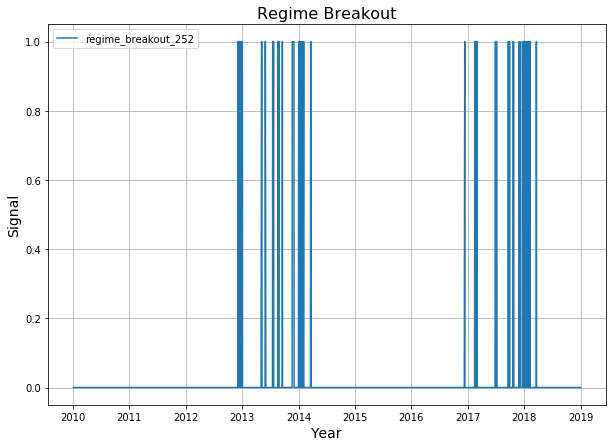

In [6]:
# Plot sma_50 against sma_200 to identify crossover
ax1=plot_graph(data[['rebased_high', 'rolling_high']], "Price",
           "Year", "Rolling & Rebased High", ['rebased_high', 'rolling_high'])

# Plot the signals
ax2=plot_graph(data['regime_breakout_252'], "Signal", "Year", "Regime Breakout",['regime_breakout_252'])

On combining the above two graphs, we get:

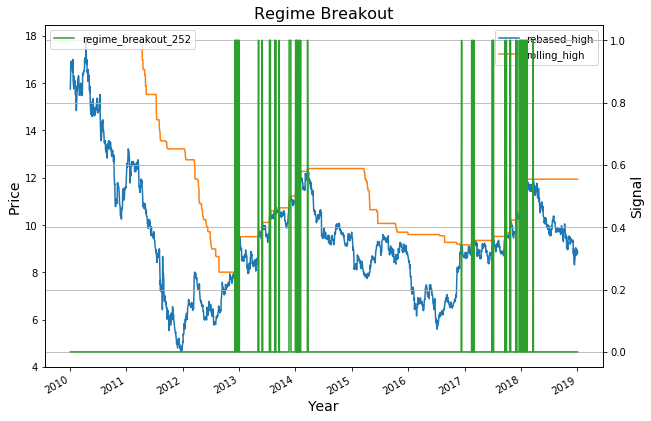

In [7]:
# Plot the 252 days regime breakout
ax = data[['rebased_high', 'rolling_high']].plot(figsize=(10, 7))
ax2 = data['regime_breakout_252'].plot(
    secondary_y=True, figsize=(10, 7), ax=ax)

ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Signal', fontsize=14)
ax2.set_title('Regime Breakout', fontsize=16)

# Add legend to the axis
plt.legend()
# Add grid to the plot
plt.grid()
# Display the graph
plt.show()

# Regime breakdown

Regime breakdown occurs whenever the price of the stock moves below a support area. In this case, when the rebased low is lower than or equal to the rolling low, we sell or short the stock. And this is called regime breakdown. Here, we create a 252 days breakdown model.

In [8]:
# Calculate and identify the regime_breakdown when 'rebased_low'<='rolling_low'
data['regime_breakdown_252'] = np.where(data['rebased_low']
                                        <= data['rolling_low'], -1, 0)

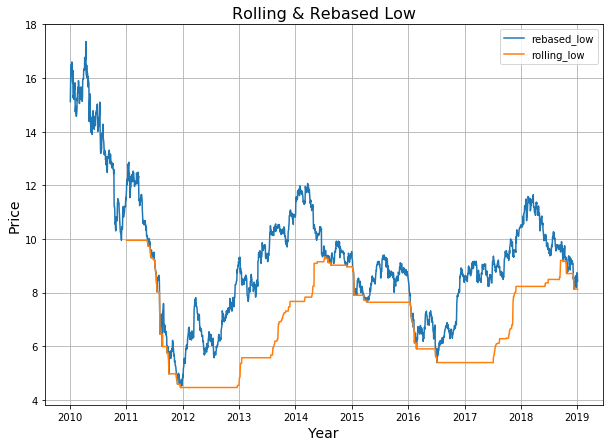

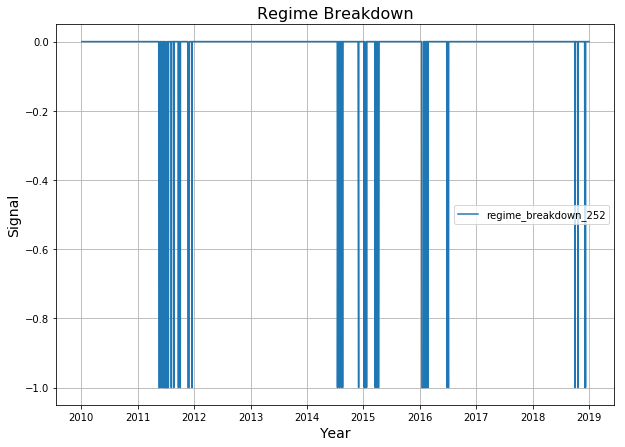

In [9]:
# Plot sma_50 against sma_200 to identify crossover
ax1=plot_graph(data[['rebased_low', 'rolling_low']], "Price",
           "Year", "Rolling & Rebased Low", ['rebased_low', 'rolling_low'])

# Plot the signals
ax2=plot_graph(data['regime_breakdown_252'], "Signal", "Year", "Regime Breakdown",['regime_breakdown_252'])

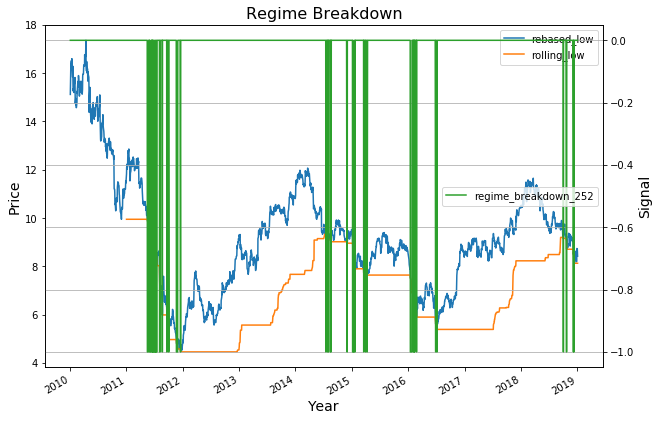

In [10]:
# Plot the 252 days breakdown to identify the breakdown
ax = data[['rebased_low', 'rolling_low']].plot(figsize=(10, 7))
ax2 = data['regime_breakdown_252'].plot(
    secondary_y=True, figsize=(10, 7), ax=ax)

ax.set_title('Regime Breakdown', fontsize=16)
ax.set_ylabel('Price', fontsize=14)
ax2.set_ylabel('Signal', fontsize=14)
ax.set_xlabel('Year', fontsize=14)

# Add legend to the plot
plt.legend()
# Add grid to the plot
plt.grid()
# Display the graph
plt.show()

# Regime breakout-breakdown

Regime breakout/breakdown occurs whenever the price of a stock moves above a resistance area or moves below a support area. 
1. Rebased low is lower than or equal to the rolling low, we sell or short the stock. 
2. Rebased high is higher than or equal to the rolling high, we buy or long the stock. 

In [11]:
# Set the breakout window as 252 or 52 weeks
breakout_window = 252

# Rolling high for 252 days
data['rolling_high'] = data['rebased_high'].rolling(
    window=breakout_window, min_periods=breakout_window).max()

# Rolling low for 252 days
data['rolling_low'] = data['rebased_low'].rolling(
    window=breakout_window, min_periods=breakout_window).min()

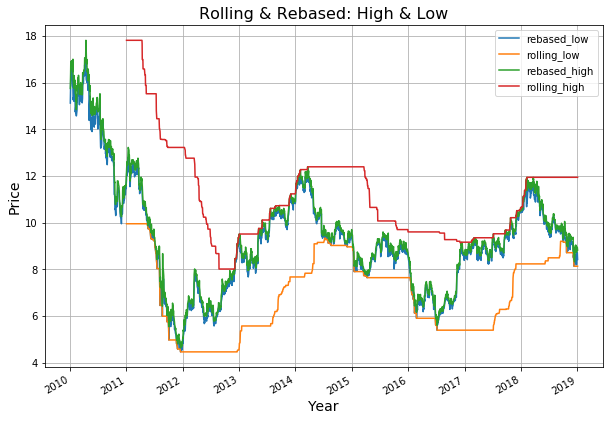

In [12]:
# Plot the rebased_high against the rolling_high to identify the breakoout 
# Plot the rebased_low against the rolling_low to identify the breakdown
data[['rebased_low', 'rolling_low', 'rebased_high',
      'rolling_high']].plot(figsize=(10, 7))
plt.title('Rolling & Rebased: High & Low', fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Add a legend
plt.legend()
# Add a grid
plt.grid()
# Display the graph
plt.show()

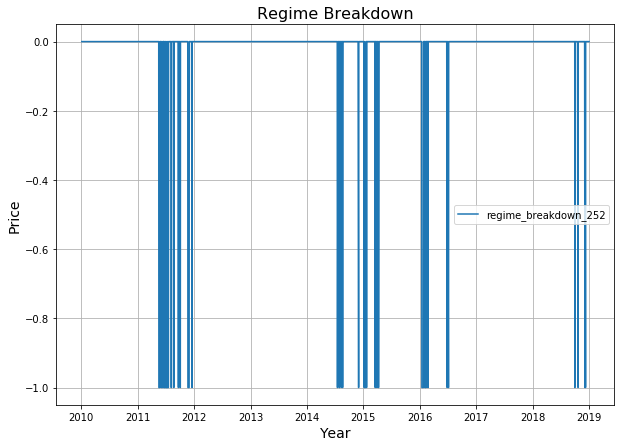

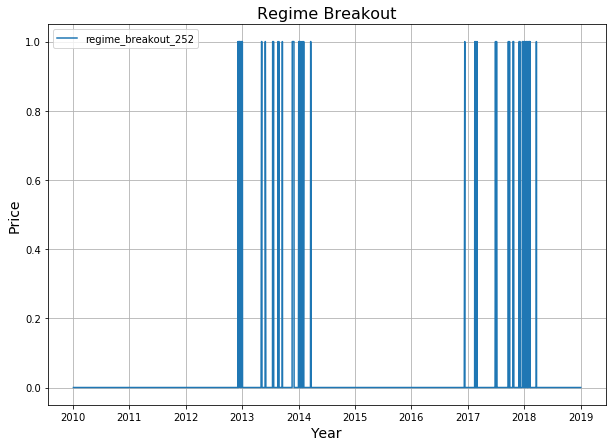

In [13]:
# Plot regime breakdown
ax1=plot_graph(data['regime_breakdown_252'], 'Price',
           'Year', 'Regime Breakdown', ['regime_breakdown_252'])

# Plot regime breakout
ax1=plot_graph(data['regime_breakout_252'], 'Price',
           'Year', 'Regime Breakout', ['regime_breakout_252'])

On combining the above two graphs, we get

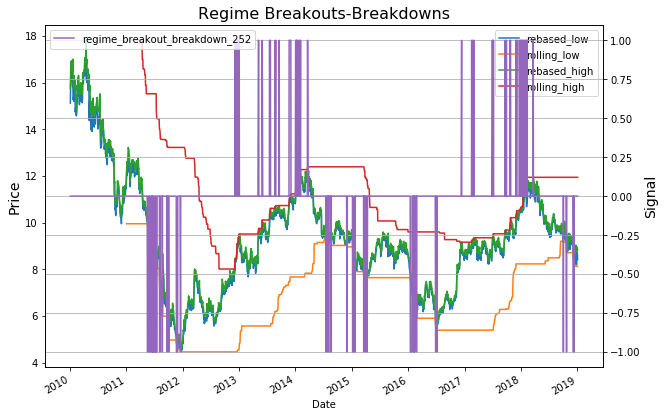

In [14]:
# Calculate and identify both regime Breakouts-Breakdowns
data['regime_breakout_breakdown_252'] = np.where(data['rebased_high'] >=
                                                 data['rolling_high'], 1, np.where(data['rebased_low'] <= data['rolling_low'], -1, 0))


# Plot the 252 days Breakout Breakdown-Breakout
ax = data[['rebased_low', 'rolling_low', 'rebased_high',
           'rolling_high']].plot(figsize=(10, 7))
ax2 = data['regime_breakout_breakdown_252'].plot(
    secondary_y=True, figsize=(10, 7), ax=ax)
ax.set_title('Regime Breakouts-Breakdowns', fontsize=16)
ax.set_ylabel('Price', fontsize=14)
ax2.set_ylabel('Signal', fontsize=14)

# Add legend to the plot
plt.legend()
# Add grid to the plot
plt.grid()
# Display the graph
plt.show()

## Create a function

Now, we create a 'regime_breakout_breakdown' function.

     '''
     breakout_window: 252 days
     df: Rebased series dataframe, Jan_2010_to_Jan_2019_Rebased_Series.csv
     high: Rebased high price
     low:  Rebased low price
     '''

In [15]:
def regime_breakout_breakdown(breakout_window, df, high, low):
    '''
    when new high:bullish +1, when new low:bearish -1
    '''

    # Define rolling high
    rolling_high = df[high].rolling(
        window=breakout_window, min_periods=breakout_window).max()
    # Define rolling low
    rolling_low = df[low].rolling(
        window=breakout_window, min_periods=breakout_window).min()

    # Calculate regime breakout when 'rebased high'>='rolling high'
    df['regime_breakout_'+str(breakout_window)] = np.where(
        df[high] >= df['rolling_high'], 1, 0)

    # Calculate regime breakdown when 'rebased low'<='rolling low'
    df['regime_breakdown_'+str(breakout_window)] = np.where(df[low]
                                                              <= df['rolling_low'], -1, 0)

    # Calculate regime breakout-breakdown
    df['regime_breakout_breakdown_'+str(breakout_window)] = np.where(df['rebased_high'] >=
                                                                        df['rolling_high'], 1, np.where(df['rebased_low'] <= df['rolling_low'], -1))

    return (data)


## Conclusion

The advantage of this method is its simplicity. It is easy to calculate and understand. 

Pros:
1. Simplicity: The origin of this method can be traced back to the Donchian channels and the Turtle Traders. For more on the topic, please read my friend Michael Covel's book: Trend following
2. This method works particularly well in breakouts after consolidation, i.e. sideways markets. Highs & Lows oscillate within a sideways band until price closes above or below the range. 

Cons:
1. The major drawback is the inherent lag. Here we set the time-period at 252 days for the regime to change. Market participants will end up giving back a lot of their gains.
2. Low win rate: market participants are often tempted to reduce the time horizon to minimize drawdowns. This, however, increases the number of false positives signals and tanks gain expectancy.